# Preliminaries

In [ ]:
# Mount drive
from google.colab import drive, runtime
drive.mount('/content/gdrive')

# Load functions
%cd gdrive/My Drive/FIFA/Cloned Repository/All_Ears/src
from sensitivity import iterate_all_mics
from models import localize_whistle
from data_preprocessing import load_unique_ref_positions

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1oF2xDqmAbEcHI3KqIc48ey_Q88_tnlPx/FIFA/Cloned Repository/All_Ears/src


# Illustrative Examples

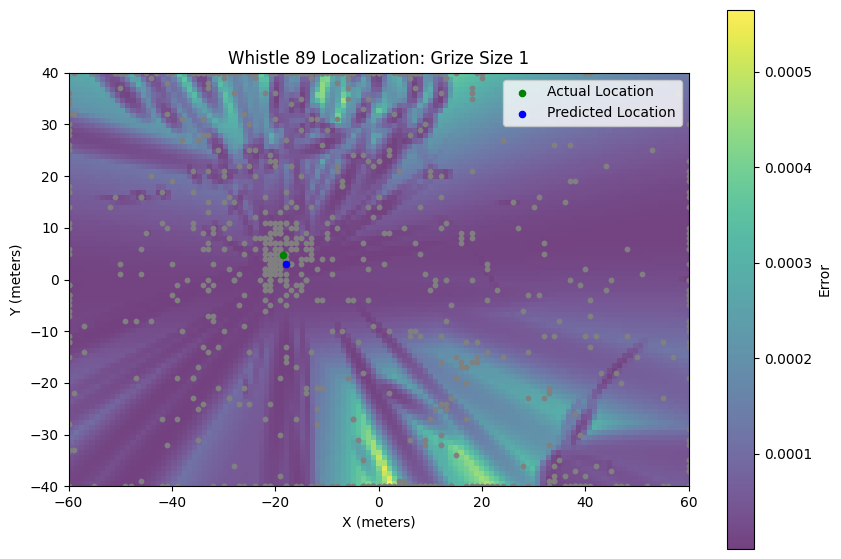

Starting point: (0, 0), with grid size: 1
Actual source location: (-18.53, 4.8)
Predicted source location (mean): (-9.367504835589942, 2.332688588007737)
Predicted source location (median): (-18.0, 3.0)


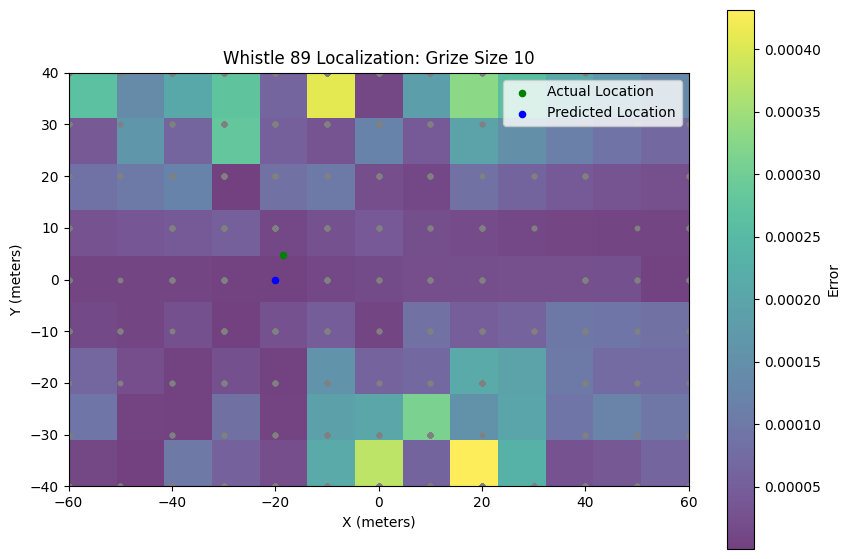

Starting point: (0, 0), with grid size: 10
Actual source location: (-18.53, 4.8)
Predicted source location (mean): (-9.959100204498977, 2.208588957055215)
Predicted source location (median): (-20.0, 0.0)


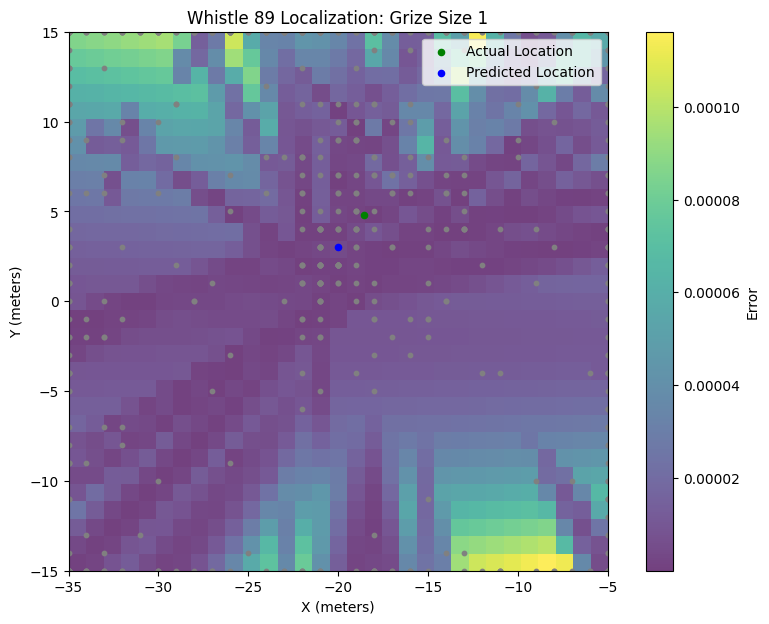

Starting point: (-20.0, 0.0), with grid size: 1
Actual source location: (-18.53, 4.8)
Predicted source location (mean): (-20.294642857142858, 3.017857142857143)
Predicted source location (median): (-20.0, 3.0)


In [ ]:
# Extract actual locations (for validation)
unique_positions = load_unique_ref_positions(
    f"../data/meta/BRA_CRO/whistles_BRA_CRO_Tagged.csv",
    f"../data/meta/BRA_CRO/refs_track_BRA_CRO.parquet",
    half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917
)

# Localize single whistle with grid size of 1
actual, pred_mean, pred_median = localize_whistle(
    file_path = "../data/snipped/BRA_CRO", whistle = 89, plot = True,
    field_length = 120, field_width = 80, speed_of_sound = 343, grid_size = [1],
    lowcut = 3750, highcut = 4250,
    unique_positions = unique_positions,
    perturb_threshold = 0, mic_index = None,
    seed = 1
)

# Localize single whistle with adaptive grid sizes
actual, pred_mean, pred_median = localize_whistle(
    file_path = "../data/snipped/BRA_CRO", whistle = 89, plot = True,
    field_length = 120, field_width = 80, speed_of_sound = 343, grid_size = [10, 1],
    lowcut = 3750, highcut = 4250,
    unique_positions = unique_positions,
    perturb_threshold = 0, mic_index = None,
    seed = 1
)

# Baseline

In [ ]:
# Brazil vs. Croatia
iterate_all_mics(match = "BRA_CRO", grid_size = [10, 1], half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917, whistles = range(2, 161))

# England vs. France
iterate_all_mics(match = "ENG_FRA", grid_size = [10, 1], half_1 = 2885357, half_2 = 189980397, whistles = range(2, 109))

# Sensitivity Analysis

### By Grid Size

In [ ]:
# Define grid sizes
grid_sizes = [[10], [5], [2.5], [1], [10, 5], [10, 2.5], [10, 1], [10, 5, 2.5], [10, 5, 1], [10, 5, 1, 0.5]]

# Loop through each grid size configuration
for grid_size in grid_sizes:
    iterate_all_mics(match = "BRA_CRO", grid_size = grid_size, half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917, whistles = range(2, 161))
    iterate_all_mics(match = "ENG_FRA", grid_size = grid_size, half_1 = 2885357, half_2 = 189980397, whistles = range(2, 109))

### By Filters

In [ ]:
# Define sound filters
filters = [(3750, 4250), (3500, 4500), (2500, 5500), (2000, 6000), (1000, 7000)]

# Loop through each grid size configuration
for lowcut, highcut in filters:
    iterate_all_mics(match = "BRA_CRO", half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917, whistles = range(2, 161), lowcut = lowcut, highcut = highcut)
    iterate_all_mics(match = "ENG_FRA", half_1 = 2885357, half_2 = 189980397, whistles = range(2, 109), lowcut = lowcut, highcut = highcut)

### By Microphone Numbers

In [ ]:
# Define microphone indices
mic_indices = [
    # 4 microphones
    [1, 7, 12, 16],
    [5, 9, 15, 17],
    [0, 4, 10, 14],
    # 6 microphones
    [0, 4, 7, 10, 14, 16],
    [1, 5, 9, 13, 14, 17]
    # 8 microphones
    [0, 1, 4, 7, 10, 12, 14, 16],
    [1, 5, 7, 9, 12, 15, 16, 17],
    # 11 microphones
    [0, 1, 4, 5, 9, 10, 12, 14, 15, 16, 17],
    # 12 microphones
    [0, 1, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17],
    # 15 microphones
    [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17]
]

# Loop through each mic index
for m in mic_indices:
    iterate_all_mics(match = "BRA_CRO", half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917, whistles = range(2, 161), mic_index = m)
    iterate_all_mics(match = "ENG_FRA", half_1 = 2885357, half_2 = 189980397, whistles = range(2, 109), mic_index = m)

### By Microphone Dropout

In [ ]:
# Define microphones
microphones = list(range(0, 18))

# Loop through each microphone
for mic in microphones:
    iterate_all_mics(match = "BRA_CRO", half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917, whistles = range(2, 161), mic_index = [m for m in microphones if m != mic])
    iterate_all_mics(match = "ENG_FRA", half_1 = 2885357, half_2 = 189980397, whistles = range(2, 109), mic_index = [m for m in microphones if m != mic])

### By Microphone Pertubation

In [1]:
# Define pertubations and seeds
pertubations = [0.1, 1, 5, 10]

# Loop through each configuration
for p in pertubations:
    iterate_all_mics(
        match = "BRA_CRO", half_1 = 8107245, half_2 = 188327149, half_3 = 344150253, half_4 = 405575917,
        whistles = [30, 140, 153],
        seeds = list(range(1, 101)),
        perturb_threshold = p
    )
    iterate_all_mics(
        match = "ENG_FRA", half_1 = 2885357, half_2 = 189980397,
        whistles = [4, 12, 92],
        seeds = list(range(1, 101)),
        perturb_threshold = p
    )